In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/large_countries_2015.csv', index_col=0)

In [5]:
df

,population,fertility,continent
Bangladesh,1.609956e+08,2.12,Asia
Brazil,2.078475e+08,1.78,South America
China,1.376049e+09,1.57,Asia
India,1.311051e+09,2.43,Asia
Indonesia,2.575638e+08,2.28,Asia
Japan,1.265735e+08,1.45,Asia
Mexico,1.270172e+08,2.13,North America
Nigeria,1.822020e+08,5.89,Africa
Pakistan,1.889249e+08,3.04,Asia
Philippines,1.006994e+08,2.98,Asia


In [6]:
df.isnull().sum()

population    0
fertility     0
continent     0
dtype: int64

In [7]:
df.dtypes

population    float64
fertility     float64
continent      object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Bangladesh to United States
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  12 non-null     float64
 1   fertility   12 non-null     float64
 2   continent   12 non-null     object 
dtypes: float64(2), object(1)
memory usage: 384.0+ bytes


In [9]:

# 4. check how many countries from each continent are in the dataset
df['continent'].value_counts()

continent
Asia             7
North America    2
South America    1
Africa           1
Europe           1
Name: count, dtype: int64

In [10]:
# 5. display a dataframe which only has countries located in Asia

df[df['continent']=='Asia']

,population,fertility,continent
Bangladesh,1.609956e+08,2.12,Asia
China,1.376049e+09,1.57,Asia
India,1.311051e+09,2.43,Asia
Indonesia,2.575638e+08,2.28,Asia
Japan,1.265735e+08,1.45,Asia
Pakistan,1.889249e+08,3.04,Asia
Philippines,1.006994e+08,2.98,Asia


In [11]:
# 6. display a dataframe which only has countries that have a population over 250,000,000

df[df['population']>250000000]


,population,fertility,continent
China,1.376049e+09,1.57,Asia
India,1.311051e+09,2.43,Asia
Indonesia,2.575638e+08,2.28,Asia
United States,3.217736e+08,1.97,North America


In [12]:
# 7. display a dataframe which only has countries that have a population of no less than 100,000 and no more than 250,000,000
pop_mask = (df['population']>100000) & (df['population']<250000000)
df[pop_mask]

,population,fertility,continent
Bangladesh,160995642.0,2.12,Asia
Brazil,207847528.0,1.78,South America
Japan,126573481.0,1.45,Asia
Mexico,127017224.0,2.13,North America
Nigeria,182201962.0,5.89,Africa
Pakistan,188924874.0,3.04,Asia
Philippines,100699395.0,2.98,Asia
Russia,143456918.0,1.61,Europe


In [13]:
# 8. display a dataframe which only has countries located in Asia that have a fertilitiy rate of less than 1.8
asia_fert = (df['fertility']< 1.8) & (df['continent'] == 'Asia')
df[asia_fert]

,population,fertility,continent
China,1.376049e+09,1.57,Asia
Japan,1.265735e+08,1.45,Asia


In [14]:
cont = pd.read_csv('../data/continents.csv', sep = ';')
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [15]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   continent  194 non-null    object
 1   country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [16]:
 graph=cont['continent'].value_counts()
graph

continent
Africa                   54
Europe                   47
Asia                     44
North America            23
Australia and Oceania    14
South America            12
Name: count, dtype: int64

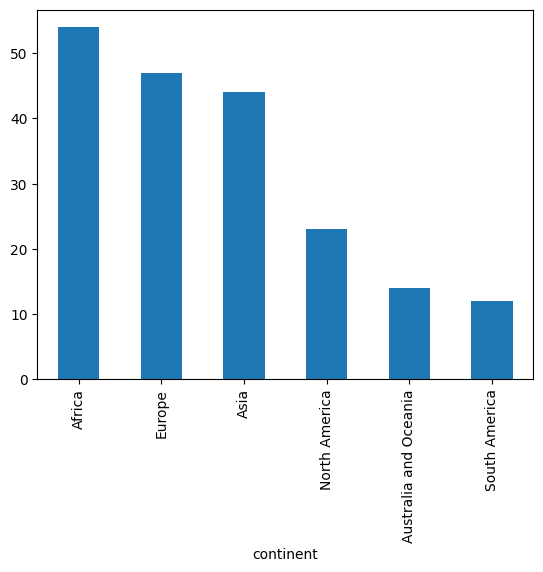

In [17]:
graph.plot(kind="bar");

In [58]:
plt.bar('Africa', 'Europa','Asia' , 'North America ', 'Australia and Oceania', 'South America'  data = cont )
plt.show()
plt.legend

SyntaxError: invalid syntax (3711946633.py, line 1)

In [18]:
cont.isnull().sum()

continent    0
country      0
dtype: int64

In [19]:
cont['continent'].count()

194

In [20]:
!pip install xlrd

In [21]:
popul = pd.read_csv('../data/population.csv')
popul

,Total population,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [22]:
#1.  Rename columns: use the method from the example above to properly name any columns that seem 
# mislabeled in the population dataset. The population dataset was given in the EDA lesson
# warmer

popul  = popul.rename(columns = {'Total population':'country'})

In [23]:
popul

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [24]:
# 2. Missing data: first check and see which and how much data is missing in the population dataset
popul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22275 entries, 0 to 22274
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     22275 non-null  object 
 1   year        22275 non-null  int64  
 2   population  20176 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 522.2+ KB


In [25]:
# 3 .Remove missing data: drop all observations with missing data

popul.isna().sum()


country          0
year             0
population    2099
dtype: int64

In [26]:
popul.dropna(axis=0, inplace = True)

In [27]:
popul

,country,year,population
1,Afghanistan,1800,3280000.0
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
5,American Samoa,1800,8170.0
6,Andorra,1800,2654.0
...,...,...,...
22256,Zambia,2015,16211767.0
22257,Zimbabwe,2015,15602751.0
22259,South Sudan,2015,12339812.0
22260,Curaçao,2015,157203.0


In [28]:
popul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20176 entries, 1 to 22261
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     20176 non-null  object 
 1   year        20176 non-null  int64  
 2   population  20176 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 630.5+ KB


In [29]:
popul.isna().sum()


country       0
year          0
population    0
dtype: int64

In [30]:
# Filter for relevant data: filter the dataset that it begins with the year 1950

mask = popul['year']> 1949
popul = popul[mask]
popul

,country,year,population
4126,Afghanistan,1950,7752118.0
4127,Akrotiri and Dhekelia,1950,10661.0
4128,Albania,1950,1263171.0
4129,Algeria,1950,8872247.0
4130,American Samoa,1950,18937.0
...,...,...,...
22256,Zambia,2015,16211767.0
22257,Zimbabwe,2015,15602751.0
22259,South Sudan,2015,12339812.0
22260,Curaçao,2015,157203.0


In [31]:
# Make data persistant: save the dataset as a .csv file in your data folder as they will be used
# for the week’s project
popul.to_csv('../data/popul.csv')

In [32]:
fert = pd.read_csv('../data/fertility_rate.csv')
fert

,Total fertility rate,year,fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56154,Yemen,2015,3.83
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35


In [33]:
fert  = fert.rename(columns = {'Total fertility rate':'country'})

In [34]:
fert

,country,year,fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56154,Yemen,2015,3.83
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35


In [35]:
fert.isna().sum()

country          0
year             0
fertility    12747
dtype: int64

In [36]:
fert.dropna(axis=0, inplace = True)

In [37]:
fert

,country,year,fertility
1,Afghanistan,1800,7.00
3,Albania,1800,4.60
4,Algeria,1800,6.99
7,Angola,1800,6.93
9,Antigua and Barbuda,1800,5.00
...,...,...,...
56150,Vietnam,2015,1.70
56151,Virgin Islands (U.S.),2015,2.45
56154,Yemen,2015,3.83
56156,Zambia,2015,5.59


In [38]:
mask = fert['year']> 1949
fert = fert[mask]
fert

,country,year,fertility
39001,Afghanistan,1950,7.67
39003,Albania,1950,5.80
39004,Algeria,1950,7.65
39007,Angola,1950,6.93
39009,Antigua and Barbuda,1950,4.45
...,...,...,...
56150,Vietnam,2015,1.70
56151,Virgin Islands (U.S.),2015,2.45
56154,Yemen,2015,3.83
56156,Zambia,2015,5.59


In [88]:
fert = fert[mask]

C:\Users\Marcio\AppData\Local\Temp\ipykernel_15508\2062043265.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fert = fert[mask]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [39]:
fert.to_csv('../data/fert.csv')

In [40]:
expect = pd.read_excel('../data/life_expectancy.xls')
expect

,Life expectancy,year,life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [41]:
expect  = expect.rename(columns = {'Life expectancy':'country'})

In [42]:
expect

,country,year,life expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [43]:
expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56420 non-null  object 
 1   year             56420 non-null  int64  
 2   life expectancy  43857 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [44]:
expect.isna().sum()

country                0
year                   0
life expectancy    12563
dtype: int64

In [45]:
expect.dropna(axis=0, inplace = True)

In [46]:
expect

,country,year,life expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54
...,...,...,...
56411,Virgin Islands (U.S.),2016,80.82
56414,Yemen,2016,64.92
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69


In [47]:
expect.isna().sum()

country            0
year               0
life expectancy    0
dtype: int64

In [48]:
mask = expect['year']> 1949
expect = expect[mask]
expect

,country,year,life expectancy
39001,Afghanistan,1950,26.85
39003,Albania,1950,54.48
39004,Algeria,1950,42.77
39007,Angola,1950,30.70
39009,Antigua and Barbuda,1950,57.97
...,...,...,...
56411,Virgin Islands (U.S.),2016,80.82
56414,Yemen,2016,64.92
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69


In [49]:
expect.to_csv('../data/expect.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'life_expectancy_cleaned.csv'

In [51]:
# 1. read the life expectancy cleaned dataset into your notebook (the dataset you created in Data Cleansing before).
# If you want to use country as the index you may use the `index_col` parameter while reading it from the file:



In [52]:
life_df = pd.read_csv('../data/expect.csv', index_col=0)
life_df

,country,year,life expectancy
39001,Afghanistan,1950,26.85
39003,Albania,1950,54.48
39004,Algeria,1950,42.77
39007,Angola,1950,30.70
39009,Antigua and Barbuda,1950,57.97
...,...,...,...
56411,Virgin Islands (U.S.),2016,80.82
56414,Yemen,2016,64.92
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69


In [53]:

# 2. calculate the mean life expectancy

life_df['life expectancy'].mean()

62.98883344276646

In [54]:
life_df.describe()

,year,life expectancy
count,13707.000000,13707.000000
mean,1983.251550,62.988833
std,19.364466,11.895572
min,1950.000000,13.200000
25%,1966.000000,54.815000
50%,1983.000000,65.570000
75%,2000.000000,72.230000
max,2016.000000,84.800000


In [55]:
# 3. calculate the mean life expectancy for the year 2000
mask2000 = life_df['year'] == 2000


In [56]:
life_df[mask2000]

,country,year,life expectancy
52001,Afghanistan,2000,50.1
52003,Albania,2000,74.7
52004,Algeria,2000,73.3
52005,American Samoa,2000,71.7
52006,Andorra,2000,83.7
...,...,...,...
52254,Yemen,2000,62.4
52256,Zambia,2000,44.8
52257,Zimbabwe,2000,47.9
52258,Åland,2000,80.0


In [57]:
life_df[mask2000]['life expectancy'].mean()

68.0777033492823

In [58]:
# # 4. calculate the median for 1995
...

mask1995 =life_df['year']==1995
life_df[mask1995]

,country,year,life expectancy
50701,Afghanistan,1995,49.40
50703,Albania,1995,73.70
50704,Algeria,1995,71.60
50705,American Samoa,1995,70.60
50706,Andorra,1995,82.60
...,...,...,...
50951,Virgin Islands (U.S.),1995,76.23
50954,Yemen,1995,60.30
50956,Zambia,1995,46.90
50957,Zimbabwe,1995,56.00


In [59]:
life_df[mask1995]['life expectancy'].median()

70.0

In [61]:

# 5. calculate the standard deviation

life_df['life expectancy'].std()


11.89557179977113

In [72]:
# 6. find the highest life expectancy
ecpectancy_max = life_df['life expectancy']==84.8

In [73]:
life_df.describe()

,year,life expectancy
count,13707.000000,13707.000000
mean,1983.251550,62.988833
std,19.364466,11.895572
min,1950.000000,13.200000
25%,1966.000000,54.815000
50%,1983.000000,65.570000
75%,2000.000000,72.230000
max,2016.000000,84.800000


In [74]:
# 7. find the country and year for the highest life expectancy

life_df.loc[ecpectancy_max]

,country,year,life expectancy
55386,Andorra,2013,84.8
55646,Andorra,2014,84.8
55906,Andorra,2015,84.8
56166,Andorra,2016,84.8


In [76]:


# 8. find the lowest life expectancy
...

# 9. find the country and year was the lowest life expectancy
...

expected_min = life_df['life expectancy'] == 13.2
life_df.loc[expected_min]

,country,year,life expectancy
50626,Rwanda,1994,13.2


In [77]:
# 10. find the 90% quantile of the life expectancy
life_df['life expectancy'].quantile([0.1,0.9])

# 90 % quantil is 76,4

0.1    45.226
0.9    76.400
Name: life expectancy, dtype: float64

In [78]:
# 11. calculate min, max, mean and possibly other descriptors with a single line
life_df.describe()

,year,life expectancy
count,13707.000000,13707.000000
mean,1983.251550,62.988833
std,19.364466,11.895572
min,1950.000000,13.200000
25%,1966.000000,54.815000
50%,1983.000000,65.570000
75%,2000.000000,72.230000
max,2016.000000,84.800000


In [80]:
# Open empty notebook and read in life_expectancy and continents datasets. Both of these datasets are available from 
# earlier lessons. Life expectancy dataset should be a cleaned version of the original dataset (the outcome of Data 
# Cleansing project milestones).

#life_expct = pd.read_csv('../data/expect.csv')
#continent = pd.read_csv ('../data/continents.csv')
#life_expct


In [81]:
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [82]:
cont.isnull().sum()

continent    0
country      0
dtype: int64

In [83]:
life_df

,country,year,life expectancy
39001,Afghanistan,1950,26.85
39003,Albania,1950,54.48
39004,Algeria,1950,42.77
39007,Angola,1950,30.70
39009,Antigua and Barbuda,1950,57.97
...,...,...,...
56411,Virgin Islands (U.S.),2016,80.82
56414,Yemen,2016,64.92
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69


In [85]:
life_df.isnull().sum()

country            0
year               0
life expectancy    0
dtype: int64

In [87]:
cont.merge(life_df)

,continent,country,year,life expectancy
0,Africa,Algeria,1950,42.77
1,Africa,Algeria,1951,43.03
2,Africa,Algeria,1952,43.50
3,Africa,Algeria,1953,43.96
4,Africa,Algeria,1954,44.44
...,...,...,...,...
11399,South America,Venezuela,2012,74.60
11400,South America,Venezuela,2013,74.70
11401,South America,Venezuela,2014,74.80
11402,South America,Venezuela,2015,74.80


In [88]:
cont.merge(life_df).isnull().sum()

continent          0
country            0
year               0
life expectancy    0
dtype: int64

In [89]:
# Saving the data frame
cont_lifeexpct = cont.merge(life_df)

In [90]:
cont_lifeexpct

,continent,country,year,life expectancy
0,Africa,Algeria,1950,42.77
1,Africa,Algeria,1951,43.03
2,Africa,Algeria,1952,43.50
3,Africa,Algeria,1953,43.96
4,Africa,Algeria,1954,44.44
...,...,...,...,...
11399,South America,Venezuela,2012,74.60
11400,South America,Venezuela,2013,74.70
11401,South America,Venezuela,2014,74.80
11402,South America,Venezuela,2015,74.80


In [95]:
#Do the same for population and fertility

cont_lexpct_pop = cont_lifeexpct.merge(popul)
cont_lexpct_pop

,continent,country,year,life expectancy,population
0,Africa,Algeria,1950,42.77,8872247.0
1,Africa,Algeria,1951,43.03,9039913.0
2,Africa,Algeria,1952,43.50,9216395.0
3,Africa,Algeria,1953,43.96,9405445.0
4,Africa,Algeria,1954,44.44,9609507.0
...,...,...,...,...,...
11227,South America,Venezuela,2011,74.80,29427631.0
11228,South America,Venezuela,2012,74.60,29854238.0
11229,South America,Venezuela,2013,74.70,30276045.0
11230,South America,Venezuela,2014,74.80,30693827.0


In [98]:
cont_lexpct_pop.isnull().sum()


continent          0
country            0
year               0
life expectancy    0
population         0
dtype: int64

In [100]:
gapminder_total =cont_lexpct_pop.merge(fert)

In [101]:
gapminder_total

,continent,country,year,life expectancy,population,fertility
0,Africa,Algeria,1950,42.77,8872247.0,7.65
1,Africa,Algeria,1951,43.03,9039913.0,7.65
2,Africa,Algeria,1952,43.50,9216395.0,7.65
3,Africa,Algeria,1953,43.96,9405445.0,7.65
4,Africa,Algeria,1954,44.44,9609507.0,7.65
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,29427631.0,2.44
11084,South America,Venezuela,2012,74.60,29854238.0,2.42
11085,South America,Venezuela,2013,74.70,30276045.0,2.39
11086,South America,Venezuela,2014,74.80,30693827.0,2.36


In [102]:
gapminder_total.isnull().sum()

continent          0
country            0
year               0
life expectancy    0
population         0
fertility          0
dtype: int64

In [103]:
gapminder_total.to_csv('../data/gapminder_total.csv')

In [110]:
# 1. Read in data:
df = pd.read_csv('../data/gapminder_total.csv' ,index_col=0 )
df

,continent,country,year,life expectancy,population,fertility
0,Africa,Algeria,1950,42.77,8872247.0,7.65
1,Africa,Algeria,1951,43.03,9039913.0,7.65
2,Africa,Algeria,1952,43.50,9216395.0,7.65
3,Africa,Algeria,1953,43.96,9405445.0,7.65
4,Africa,Algeria,1954,44.44,9609507.0,7.65
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,29427631.0,2.44
11084,South America,Venezuela,2012,74.60,29854238.0,2.42
11085,South America,Venezuela,2013,74.70,30276045.0,2.39
11086,South America,Venezuela,2014,74.80,30693827.0,2.36


In [114]:
# 2. What is the median population in the data set?

df['population'].median()

5190648.5

In [117]:

# 3. How often does each continent appear in the data set?

df['continent'].value_counts()

continent
Africa                   3234
Europe                   2640
Asia                     2574
North America            1254
South America             792
Australia and Oceania     594
Name: count, dtype: int64

In [120]:
# 4. Which continent has the lowest average fertility rate overall?
df.groupby('continent')['fertility'].mean()

# Europe has the lowest averege fertility rate

continent
Africa                   5.931345
Asia                     4.673862
Australia and Oceania    4.682172
Europe                   2.169754
North America            4.002329
South America            4.077235
Name: fertility, dtype: float64

In [124]:
# 5. What was the average life expectancy in Europe in 2015? 
# Hint: first filter for 2015 then apply groupby.
df_2015 = df['year'] == 2015
df[df_2015]


,continent,country,year,life expectancy,population,fertility
65,Africa,Algeria,2015,76.4,39666519.0,2.71
131,Africa,Angola,2015,59.6,25021974.0,5.65
197,Africa,Benin,2015,62.3,10879829.0,4.69
263,Africa,Botswana,2015,58.7,2262485.0,2.54
329,Africa,Burundi,2015,61.4,11178921.0,5.85
...,...,...,...,...,...,...
10823,South America,Paraguay,2015,74.4,6639123.0,2.80
10889,South America,Peru,2015,79.5,31376670.0,2.36
10955,South America,Suriname,2015,72.0,542975.0,2.22
11021,South America,Uruguay,2015,76.8,3431555.0,2.03


In [126]:
(df[df_2015]).groupby('continent')['life expectancy'].mean()

# Life expectency for Europe is 78, 7 years

continent
Africa                   63.410204
Asia                     73.933333
Australia and Oceania    69.666667
Europe                   78.755000
North America            75.152632
South America            75.141667
Name: life expectancy, dtype: float64

In [129]:

# 6. How many countries does each continent have in the dataset?
# Hint: filter for one year and count
(df[df_2015])['country'].value_counts().sum()


168

In [140]:


# 7. What is the average population of a European country in 1976 compare to 2015?
# Hint: once again filter for the year in question and do each year separately to compare
df_1976 = df['year'] == 1976
df[df_1976]


,continent,country,year,life expectancy,population,fertility
26,Africa,Algeria,1976,56.11,17190236.0,7.34
92,Africa,Angola,1976,44.68,7299508.0,7.19
158,Africa,Benin,1976,47.46,3345501.0,6.96
224,Africa,Botswana,1976,58.07,853860.0,6.44
290,Africa,Burundi,1976,44.43,3744696.0,7.44
...,...,...,...,...,...,...
10784,South America,Paraguay,1976,70.81,2861582.0,5.20
10850,South America,Peru,1976,59.99,15639898.0,5.57
10916,South America,Suriname,1976,66.47,361368.0,4.53
10982,South America,Uruguay,1976,69.58,2841436.0,2.95


In [169]:
europe=df['continent']== 'Europe'
europe76=df[europe & df_1976]
europe76

,continent,country,year,life expectancy,population,fertility
5834,Europe,Albania,1976,70.17,2464338.0,4.24
5900,Europe,Armenia,1976,72.38,2882831.0,2.65
5966,Europe,Austria,1976,71.77,7630536.0,1.69
6032,Europe,Azerbaijan,1976,65.92,5789050.0,3.81
6098,Europe,Belarus,1976,71.46,9423421.0,2.13
6164,Europe,Belgium,1976,72.05,9787576.0,1.78
6230,Europe,Bosnia and Herzegovina,1976,73.24,4008411.0,2.34
6296,Europe,Bulgaria,1976,71.44,8761231.0,2.19
6362,Europe,Croatia,1976,70.00,4518103.0,2.00
6428,Europe,Cyprus,1976,74.15,657526.0,2.32


In [171]:
europe76['population'].mean()

13840493.8

In [173]:
df_2015 = df['year'] == 2015
df[df_2015]
europe2015=df[europe & df_2015]
europe2015

,continent,country,year,life expectancy,population,fertility
5873,Europe,Albania,2015,78.0,2896679.0,1.78
5939,Europe,Armenia,2015,74.7,3017712.0,1.41
6005,Europe,Austria,2015,81.3,8544586.0,1.50
6071,Europe,Azerbaijan,2015,72.9,9753968.0,1.89
6137,Europe,Belarus,2015,71.0,9495826.0,1.51
6203,Europe,Belgium,2015,80.5,11299192.0,1.86
6269,Europe,Bosnia and Herzegovina,2015,78.9,3810416.0,1.32
6335,Europe,Bulgaria,2015,74.8,7149787.0,1.57
6401,Europe,Croatia,2015,77.8,4240317.0,1.52
6467,Europe,Cyprus,2015,81.8,1165300.0,1.46


In [174]:
europe2015['population'].mean()

# population 1976 ca. 13 Mio & 2015 ca. 15 Mio

15122675.725

In [231]:

# BONUS

# 8. What is the highest population a continent ever had?
# Hint: group by multiple columns
df.groupby('continent')['population'].max()

continent
Africa                   1.822020e+08
Asia                     1.376049e+09
Australia and Oceania    2.396897e+07
Europe                   8.201018e+07
North America            3.217736e+08
South America            2.078475e+08
Name: population, dtype: float64

continent
Africa                   1.822020e+08
Asia                     1.376049e+09
Australia and Oceania    2.396897e+07
Europe                   8.201018e+07
North America            3.217736e+08
South America            2.078475e+08
Name: population, dtype: float64

In [ ]:


# 9. Which continent had that population and in which year?
# Hint: group by multiple columns and filter for the result from #6

# 10. Plot a bar plot comparison of life_expectancy, fertility, population 
# average per continent
# Hint: for a quick and dirty graph use Pandas ploting ability
# Hint: use log=True to make the visual more friendly to the eyes

In [178]:
# Step 1

# Open empty jupyter notebook and read in the dataframe that contains your 
# gapminder data
df = pd.read_csv('../data/gapminder_total.csv', index_col = 0)
df

,continent,country,year,life expectancy,population,fertility
0,Africa,Algeria,1950,42.77,8872247.0,7.65
1,Africa,Algeria,1951,43.03,9039913.0,7.65
2,Africa,Algeria,1952,43.50,9216395.0,7.65
3,Africa,Algeria,1953,43.96,9405445.0,7.65
4,Africa,Algeria,1954,44.44,9609507.0,7.65
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,29427631.0,2.44
11084,South America,Venezuela,2012,74.60,29854238.0,2.42
11085,South America,Venezuela,2013,74.70,30276045.0,2.39
11086,South America,Venezuela,2014,74.80,30693827.0,2.36


In [187]:
df_subset = df[df['year'] == 1994]
df_subset

,continent,country,year,life expectancy,population,fertility
44,Africa,Algeria,1994,71.4,28362015.0,3.71
110,Africa,Angola,1994,50.0,12648483.0,7.05
176,Africa,Benin,1994,56.8,5786794.0,6.45
242,Africa,Botswana,1994,58.6,1539135.0,4.12
308,Africa,Burundi,1994,45.0,6134041.0,7.37
...,...,...,...,...,...,...
10802,South America,Paraguay,1994,74.0,4651222.0,4.18
10868,South America,Peru,1994,70.5,23619358.0,3.41
10934,South America,Suriname,1994,69.8,438280.0,2.65
11000,South America,Uruguay,1994,73.3,3201604.0,2.43


In [191]:
df_subset = df.loc[df['year'] == 1994]
df_subset

,continent,country,year,life expectancy,population,fertility
44,Africa,Algeria,1994,71.4,28362015.0,3.71
110,Africa,Angola,1994,50.0,12648483.0,7.05
176,Africa,Benin,1994,56.8,5786794.0,6.45
242,Africa,Botswana,1994,58.6,1539135.0,4.12
308,Africa,Burundi,1994,45.0,6134041.0,7.37
...,...,...,...,...,...,...
10802,South America,Paraguay,1994,74.0,4651222.0,4.18
10868,South America,Peru,1994,70.5,23619358.0,3.41
10934,South America,Suriname,1994,69.8,438280.0,2.65
11000,South America,Uruguay,1994,73.3,3201604.0,2.43


In [189]:
import seaborn as sns

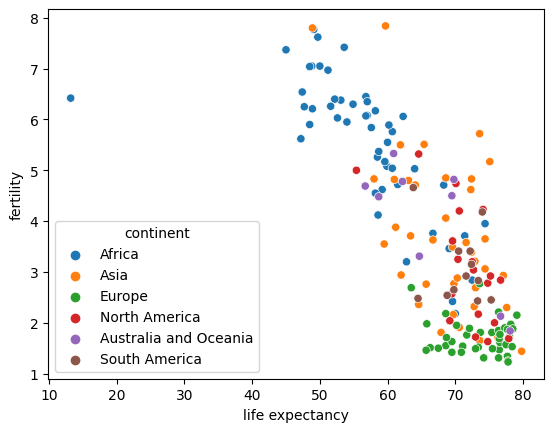

In [193]:
# Step 4  Plot the life expectancy vs fertility rate

sns.scatterplot(x = 'life expectancy', y = 'fertility', data=df_subset, hue = 'continent'); 



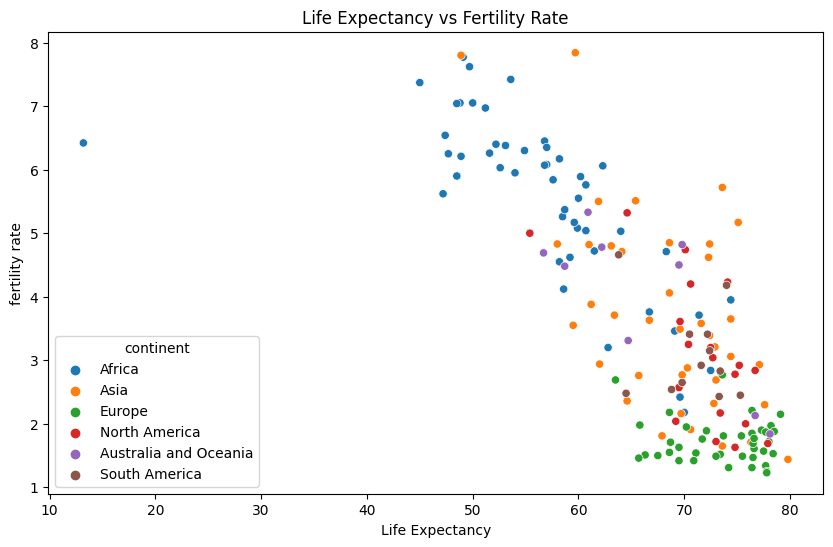

In [197]:
# Step 5

# Using matplotlib add a title and labels. Increase the plot size to make it
# more readable.

plt.figure(figsize=(10, 6))
plt.title('Life Expectancy vs Fertility Rate')
plt.ylabel('fertility rate')
plt.xlabel('Life Expectancy')

sns.scatterplot(x = 'life expectancy', y = 'fertility', data=df_subset, hue = 'continent'); 


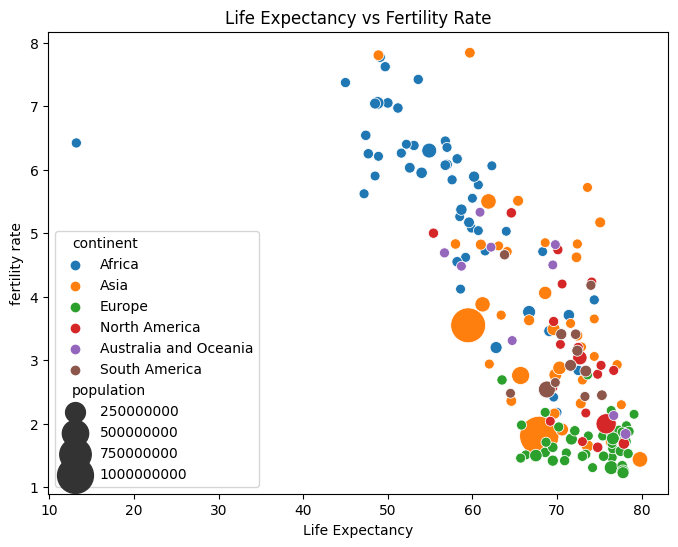

In [215]:
# Step 6

# Weight the size of the scatter points to the population of each country. This
# can be done using the size parameter in the sns.scatterplot() function.

# Tip: the code above is correct but the magnitude of the population is 
#    astronomically larger than that of the life expectancy and fertility rate.
#    Use some math to fix this.

plt.figure(figsize=(8, 6))
plt.title('Life Expectancy vs Fertility Rate')
plt.ylabel('fertility rate')
plt.xlabel('Life Expectancy')

sns.scatterplot(x = 'life expectancy', y = 'fertility', 
                data=df_subset, hue = 'continent', size = 'population',
                sizes =(50,800)); 


C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

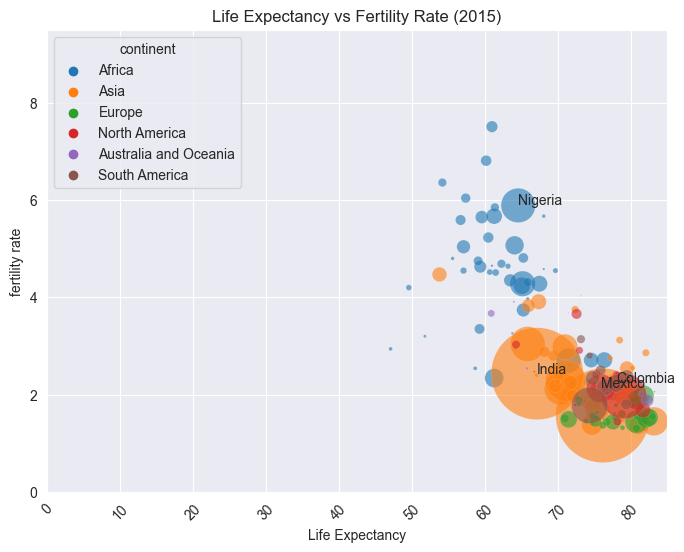

In [305]:
# Step 7

# Setting the axes to display the origin also gives us a more complete picture
# of what is going on.

plt.figure(figsize=(8, 6))
plt.title(f'Life Expectancy vs Fertility Rate ({year})')
plt.ylabel('fertility rate')
plt.xlabel('Life Expectancy')
plt.axis([0, 85, 0, 9.5])

sns.set_style("darkgrid")
sns.scatterplot(x = 'life expectancy', y = 'fertility', 
                data=df_subset, hue = 'continent', 
                s= (df_subset['population']/300000),
                alpha=0.6, 
                sizes =(100,400)); 
# size = 'population'palette='magma_r'
plt.annotate('Mexico', (df_subset[df_subset['country']=='Mexico']['life expectancy'], 
                        df_subset[df_subset['country']=='Mexico']['fertility']+0.01 ))
plt.annotate('Nigeria', (df_subset[df_subset['country']=='Nigeria']['life expectancy'], 
                        df_subset[df_subset['country']=='Nigeria']['fertility']+0.01 ))
plt.annotate('India', (df_subset[df_subset['country']=='India']['life expectancy'], 
                        df_subset[df_subset['country']=='India']['fertility']+0.01 ))
plt.annotate('Colombia', (df_subset[df_subset['country']=='Colombia']['life expectancy'], 
                        df_subset[df_subset['country']=='Colombia']['fertility']+0.01 ))
plt.xticks(rotation=45)
plt.savefig('../data/lifeexpect_fertility.png')


In [323]:
!mkdir -p frames


In [324]:
PATH = 'frames'




In [325]:
# THE LOOP (Step 1,2,3 & 4 )

for year in range (1950,2016):
    df_subset = df[df['year']== year]
    """ This function is for creatin a loop, that  generates a imgae of each
    year as di"""
    
    plt.figure(figsize=(8, 6))
    plt.title(f'Life Expectancy vs Fertility Rate ({year})')
    plt.ylabel('fertility rate')
    plt.xlabel('Life Expectancy')
    plt.axis([0, 85, 0, 9.5])

    sns.set_style("darkgrid")
    sns.scatterplot(x = 'life expectancy', y = 'fertility', 
                data=df_subset, hue = 'continent', 
                s= (df_subset['population']/300000),
                alpha=0.6, 
                sizes =(100,400)); 
# size = 'population'palette='magma_r'
    plt.annotate('Mexico', (df_subset[df_subset['country']=='Mexico']['life expectancy'], 
                        df_subset[df_subset['country']=='Mexico']['fertility']+0.01 ))
    plt.annotate('Nigeria', (df_subset[df_subset['country']=='Nigeria']['life expectancy'], 
                        df_subset[df_subset['country']=='Nigeria']['fertility']+0.01 ))
    plt.annotate('India', (df_subset[df_subset['country']=='India']['life expectancy'], 
                        df_subset[df_subset['country']=='India']['fertility']+0.01 ))
    plt.annotate('Colombia', (df_subset[df_subset['country']=='Colombia']['life expectancy'], 
                        df_subset[df_subset['country']=='Colombia']['fertility']+0.01 ))
    plt.xticks(rotation=45)
    
    filename = f'plot_{year}.png'
    plt.savefig(f'{PATH}/{filename}')
    plt.close()

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\Marcio\miniconda3\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunit

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11088 entries, 0 to 11087
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   continent        11088 non-null  object 
 1   country          11088 non-null  object 
 2   year             11088 non-null  int64  
 3   life expectancy  11088 non-null  float64
 4   population       11088 non-null  float64
 5   fertility        11088 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 606.4+ KB


In [279]:
df_subset

,continent,country,year,life expectancy,population,fertility
65,Africa,Algeria,2015,76.4,39666519.0,2.71
131,Africa,Angola,2015,59.6,25021974.0,5.65
197,Africa,Benin,2015,62.3,10879829.0,4.69
263,Africa,Botswana,2015,58.7,2262485.0,2.54
329,Africa,Burundi,2015,61.4,11178921.0,5.85
...,...,...,...,...,...,...
10823,South America,Paraguay,2015,74.4,6639123.0,2.80
10889,South America,Peru,2015,79.5,31376670.0,2.36
10955,South America,Suriname,2015,72.0,542975.0,2.22
11021,South America,Uruguay,2015,76.8,3431555.0,2.03


In [267]:
!pip install imageio

     ---------------------------------------- 3.4/3.4 MB 2.0 MB/s eta 0:00:00


In [268]:
# generating a gift
import imageio

In [334]:

images = []

for year in range(1950, 2016):
    filename = f'{PATH}/plot_{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('animated_plot.gif', images)


C:\Users\Marcio\AppData\Local\Temp\ipykernel_14352\282455187.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [352]:
europe_time = df[europe]
europe_t_94 = europe_time[europe_time['year'] == 1994]
europe_t_94

,continent,country,year,life expectancy,population,fertility
5852,Europe,Albania,1994,73.6,3140634.0,2.77
5918,Europe,Armenia,1994,68.6,3289943.0,2.18
5984,Europe,Austria,1994,76.5,7929911.0,1.47
6050,Europe,Azerbaijan,1994,63.5,7675128.0,2.69
6116,Europe,Belarus,1994,68.6,10190064.0,1.55
6182,Europe,Belgium,1994,76.6,10130251.0,1.61
6248,Europe,Bosnia and Herzegovina,1994,71.1,3992256.0,1.54
6314,Europe,Bulgaria,1994,70.9,8451626.0,1.42
6380,Europe,Croatia,1994,73.4,4657799.0,1.52
6446,Europe,Cyprus,1994,76.4,837166.0,2.21


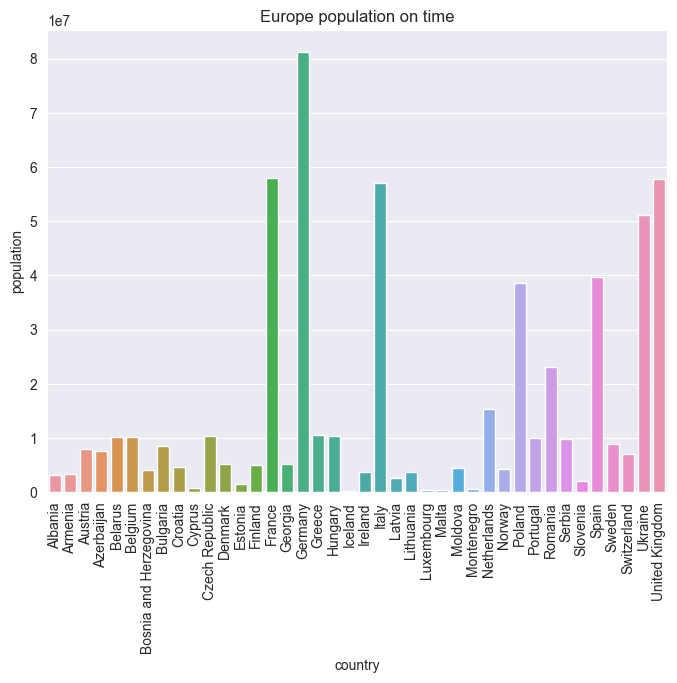

In [356]:
plt.figure(figsize=(8, 6))
plt.title('Europe population on time')


sns.barplot(x ="country", y="population", errorbar= None, data=europe_t_94);
plt.xticks(rotation=90);



In [357]:
PATH2 = './data/'

In [370]:
for year in range (1950,2016):
    europe_t_94 = europe_time[europe_time['year']== year]
    """ This function is for creatin a loop, that  generates a imgae of each
    year population in europa as in 1994"""
    
    plt.figure(figsize=(8, 6))
    plt.ylabel('Population in Mio')
    plt.xlabel('Country')
    plt.title(f'Europe population on time({year})')



    sns.barplot(x ="country", y="population", errorbar= None, data=europe_t_94)
    plt.xticks(rotation=90);

    
    filename = f'plot_europe{year}.png'
    plt.savefig(f'{PATH2}/{filename}')
    plt.close()

In [371]:
images = []

for year in range(1950, 2016):
    filename = f'{PATH2}/plot_europe{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('animated_plot_europe.gif', images)

C:\Users\Marcio\AppData\Local\Temp\ipykernel_14352\3860989977.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [377]:
sa = df['continent']=='South America'
sa

0        False
1        False
2        False
3        False
4        False
         ...  
11083     True
11084     True
11085     True
11086     True
11087     True
Name: continent, Length: 11088, dtype: bool

In [380]:
sat=df[sa]
sat

,continent,country,year,life expectancy,population,fertility
10296,South America,Argentina,1950,61.61,17150335.0,3.16
10297,South America,Argentina,1951,61.93,17507132.0,3.16
10298,South America,Argentina,1952,62.54,17866097.0,3.16
10299,South America,Argentina,1953,63.10,18224150.0,3.15
10300,South America,Argentina,1954,63.59,18579041.0,3.15
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,29427631.0,2.44
11084,South America,Venezuela,2012,74.60,29854238.0,2.42
11085,South America,Venezuela,2013,74.70,30276045.0,2.39
11086,South America,Venezuela,2014,74.80,30693827.0,2.36


In [381]:
sa_t_94 = sat[sat['year'] == 1994]
sa_t_94

,continent,country,year,life expectancy,population,fertility
10340,South America,Argentina,1994,73.4,34558114.0,2.83
10406,South America,Bolivia,1994,63.8,7418864.0,4.66
10472,South America,Brazil,1994,68.8,160260508.0,2.54
10538,South America,Chile,1994,75.3,13987999.0,2.45
10604,South America,Colombia,1994,71.6,36823539.0,2.92
10670,South America,Ecuador,1994,72.2,11196476.0,3.41
10736,South America,Guyana,1994,64.5,723230.0,2.48
10802,South America,Paraguay,1994,74.0,4651222.0,4.18
10868,South America,Peru,1994,70.5,23619358.0,3.41
10934,South America,Suriname,1994,69.8,438280.0,2.65


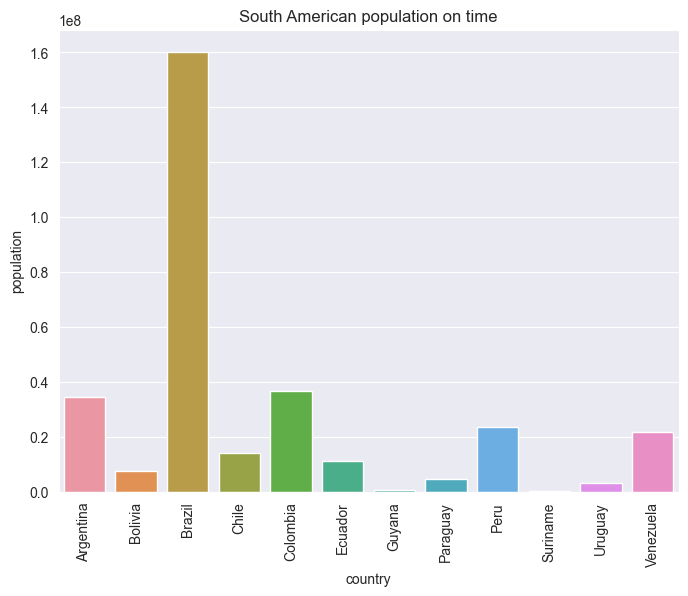

In [382]:
plt.figure(figsize=(8, 6))
plt.title('South American population on time')


sns.barplot(x ="country", y="population", errorbar= None, data=sa_t_94)
plt.xticks(rotation=90);


In [383]:
for year in range (1950,2016):
    sa_t_94 = sat[sat['year']== year]
    """ This function is for creatin a loop, that  generates a imgae of each
    year population in South America as in 1994"""
    
    plt.figure(figsize=(8, 6))
    plt.ylabel('Population in Mio')
    plt.xlabel('Country')
    plt.title(f'South America population on time({year})')



    sns.barplot(x ="country", y="population", errorbar= None, data=sa_t_94)
    plt.xticks(rotation=90);

    
    filename = f'plot_sat{year}.png'
    plt.savefig(f'{PATH2}/{filename}')
    plt.close()

In [384]:
images = []

for year in range(1950, 2016):
    filename = f'{PATH2}/plot_sat{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('animated_plot_sat.gif', images)

C:\Users\Marcio\AppData\Local\Temp\ipykernel_14352\4160703326.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [390]:
colombia = df['country']== 'Colombia'
col = df[colombia]
col

,continent,country,year,life expectancy,population,fertility
10560,South America,Colombia,1950,49.03,12340899.0,6.78
10561,South America,Colombia,1951,49.70,12699949.0,6.77
10562,South America,Colombia,1952,50.93,13064689.0,6.76
10563,South America,Colombia,1953,52.08,13438645.0,6.75
10564,South America,Colombia,1954,53.16,13824721.0,6.75
...,...,...,...,...,...,...
10621,South America,Colombia,2011,77.00,46406446.0,2.35
10622,South America,Colombia,2012,77.30,46881018.0,2.32
10623,South America,Colombia,2013,77.50,47342363.0,2.29
10624,South America,Colombia,2014,77.80,47791393.0,2.26


ValueError: Could not interpret value `year` for parameter `x`

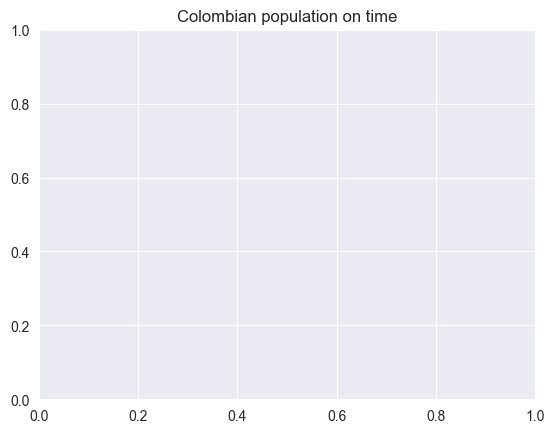

In [394]:
plt.figure
plt.title('Colombian population on time')

sns.histplot(x ="year", y="population", errorbar= None, data=colombia);
